# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
# Preparing the tools

# regular eda and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluating
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

### Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Exploratory Data Analysis (EDA)

In [3]:
df.shape

(303, 14)

In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

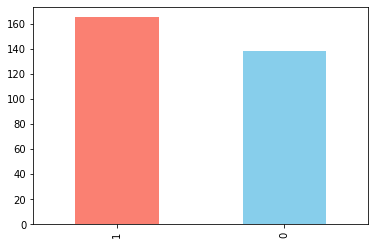

In [5]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'skyblue']);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#heart disease freq vs sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


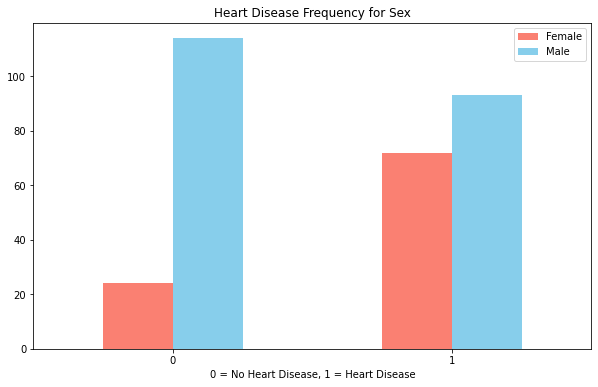

In [11]:
pd.crosstab(df['target'], df['sex']).plot(kind='bar', color=['salmon', 'skyblue'], figsize=(10,6))
plt.xlabel('0 = No Heart Disease, 1 = Heart Disease')
plt.title('Heart Disease Frequency for Sex')
plt.legend(['Female', 'Male'], loc='upper right')
plt.xticks(rotation=0)
plt.show()

### Age vs Max Heart Rate

thalach - maximum heart rate achieved

In [12]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [13]:
# age samples with positive target
df[df['target'] == 1]['age'].head()

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [14]:
# thalach samples with positive target
df[df['target'] == 1]['thalach'].head()

0    150
1    187
2    172
3    178
4    163
Name: thalach, dtype: int64

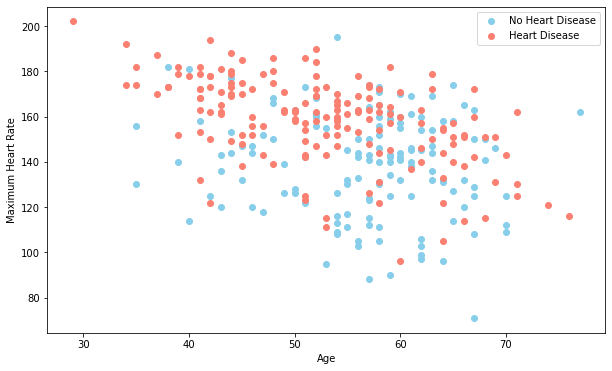

In [15]:
#scatter plot for Age vs Max Heart Rate

plt.figure(figsize=(10,6))
# scatter with negative examples  
plt.scatter(df[df['target'] == 0]['age'], df[df['target'] == 0]['thalach'], c='skyblue', label='No Heart Disease')
# scatter with positive examples
plt.scatter(df[df['target'] == 1]['age'], df[df['target'] == 1]['thalach'], c='salmon', label='Heart Disease')

plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend()
plt.show()

<AxesSubplot:>

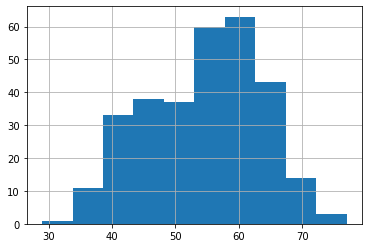

In [16]:
df['age'].hist()

### Heart Disease Frequency per Chest Pain Type

cp - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


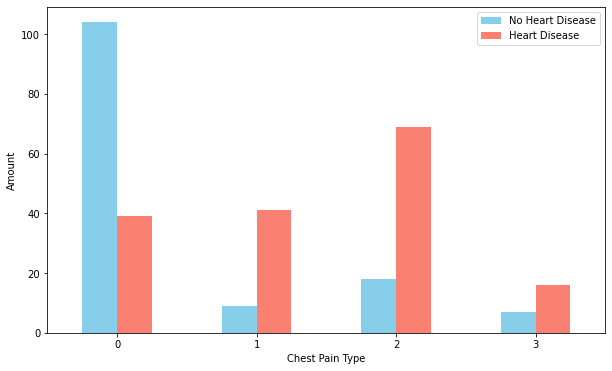

In [18]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color=['skyblue', 'salmon'], figsize=(10,6))
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.ylabel('Amount')
plt.legend(['No Heart Disease',  'Heart Disease'])
plt.show()

### Correlation matrix

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


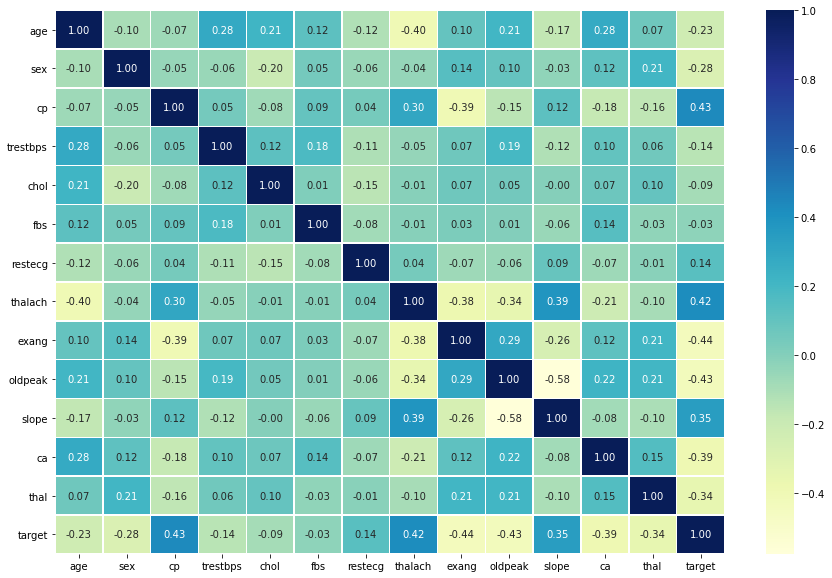

In [20]:
#visualize correlations using heatmap
corr_mtx = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mtx, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')

### Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#split data into X and y i.e training data and test data
X = df.drop('target', axis=1)

y = df['target']

In [23]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
#splitting data into training and test split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#### training the machine learning model

3 learning models

* logistic Regression
* KNN classifier

* Random Forest Classifier

In [26]:
# putting models in dictionary so that we can access the three models together
models = {'Logistic Regression' : LogisticRegression(),
         'KNN' : KNeighborsClassifier(),
         'Random Forest' : RandomForestClassifier()}

#creating function to fit and score models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    scores={}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)
    return scores

In [27]:
model_scores = evaluate_models(models, X_train, X_test, y_train, y_test)
model_scores

D:\MyApps\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Comparing Models

In [28]:
comparison = pd.DataFrame(model_scores, index=['model_accuracy'])
comparison

,Logistic Regression,KNN,Random Forest
model_accuracy,0.885246,0.688525,0.836066


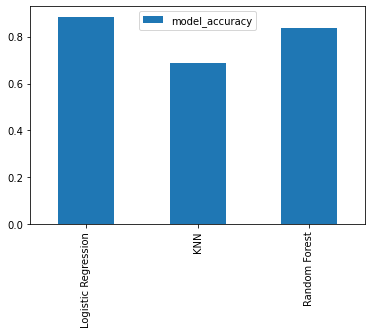

In [29]:
comparison.T.plot.bar();

Lets explore more and further evaluate our model

* Hyperparameter Tuning
* Feature importance
* Confusion Matrix
* Cross val score
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under curve(AUC)

### Hyperparameter tuning by hand

In [30]:
# Tuning KNN by hand

train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

The maximum test score for knn is 75.41%


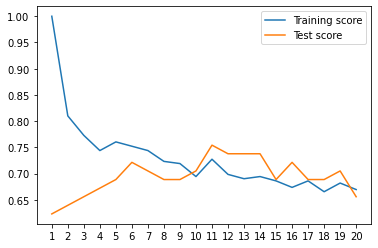

In [33]:
plt.plot(neighbors, train_scores, label='Training score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1,21,1))
plt.legend();

print(f'The maximum test score for knn is {max(test_scores)*100:.2f}%')

### Hyperparameter tuning by Randomized Search CV

In [34]:
#create hyperparameter grid for logistic Regression
lr_grid = {'C' : np.logspace(-4,4,20),
          'solver' : ['liblinear']}

#create hyperparameter grid for random forest classifier
rf_grid = {'n_estimators' : np.arange(10,1000,50),
          'max_depth' : [None,3,5,7,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf' : np.arange(1,20,2)}

In [35]:
#Tuning Logistic Regression

np.random.seed(42)

rs_lr = RandomizedSearchCV(LogisticRegression(), param_distributions=lr_grid, cv=5, n_iter=20, verbose=True)

rs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_lr.score(X_test, y_test)

0.8852459016393442

In [38]:
# tuning random forest classifier

np.random.seed(43)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 7, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
rs_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [40]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Tuning Hyperparameters by using Grid Search CV

In [42]:
# Tuning Logistic Regression with GSCV

#create hyperparameter grid for logistic Regression
lr_grid = {'C' : np.logspace(-4,4,30),
          'solver' : ['liblinear']}

#set up GSCV

gs_lr = GridSearchCV(LogisticRegression(), param_grid=lr_grid, cv=5, verbose=True)

gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
gs_lr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
gs_lr.score(X_test, y_test)

0.8852459016393442

### Evaluating other scores

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 score

to make comparisons we need to make predictions first

In [46]:
# make predictions on previous fitted model during grid search CV
y_preds = gs_lr.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

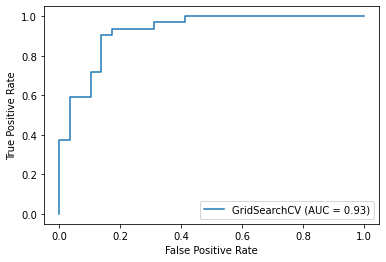

In [50]:
#plot roc curve and calculate AUC metric
plot_roc_curve(gs_lr, X_test, y_test)

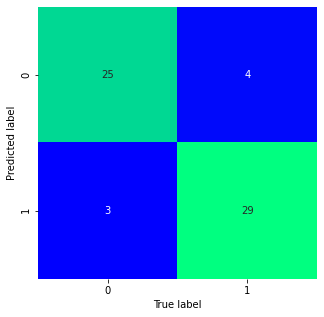

In [59]:
# plotting confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap='winter', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [60]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [61]:
# calculate precision, recall and f1 score using cross val

gs_lr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [63]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

# cross val score
#accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [65]:
#precision
cv_pre = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [66]:
#recall
cv_rec = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [70]:
#f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

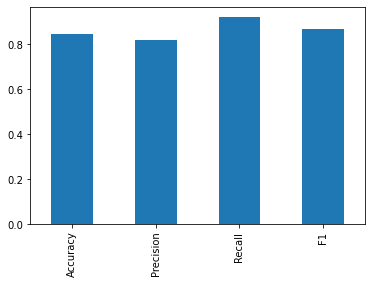

In [74]:
#Visualize crossval metrics

cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'Precision' : cv_pre,
                           'Recall' : cv_rec,
                           'F1' : cv_f1},index=[0])
cv_metrics.T.plot.bar(legend=False);

### Feature Importance

which features contributed most to the outcomes of the model and how did they contribute?
finding feature importance is different for every ml model

In [77]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
#finding feature importance of logistic regression model
gs_lr.best_params_

clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [80]:
#Check coef_

clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [81]:
#put the coef in dict with feature names

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

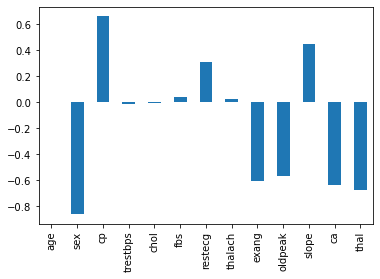

In [93]:
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(legend=False);

In [94]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [95]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [96]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16
